In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
%matplotlib inline

In [16]:
bj_nb_weight = np.load('/Users/towardsun/Documents/Workspace/python/mobike-dist/logs/e1cb8b5a-31a1-11e8-a81a-6a00022fd770/kernel_weight.npy')

In [17]:
kernel, bias = bj_nb_weight

In [18]:
width, height, depth, filters = kernel.shape

In [19]:
from const import FEATURES

## Kernel Plot

In [23]:
f_index = 0
f_kerenl = kernel[:, :, :, f_index]

In [25]:
f_kerenl.shape

(5, 5, 60)

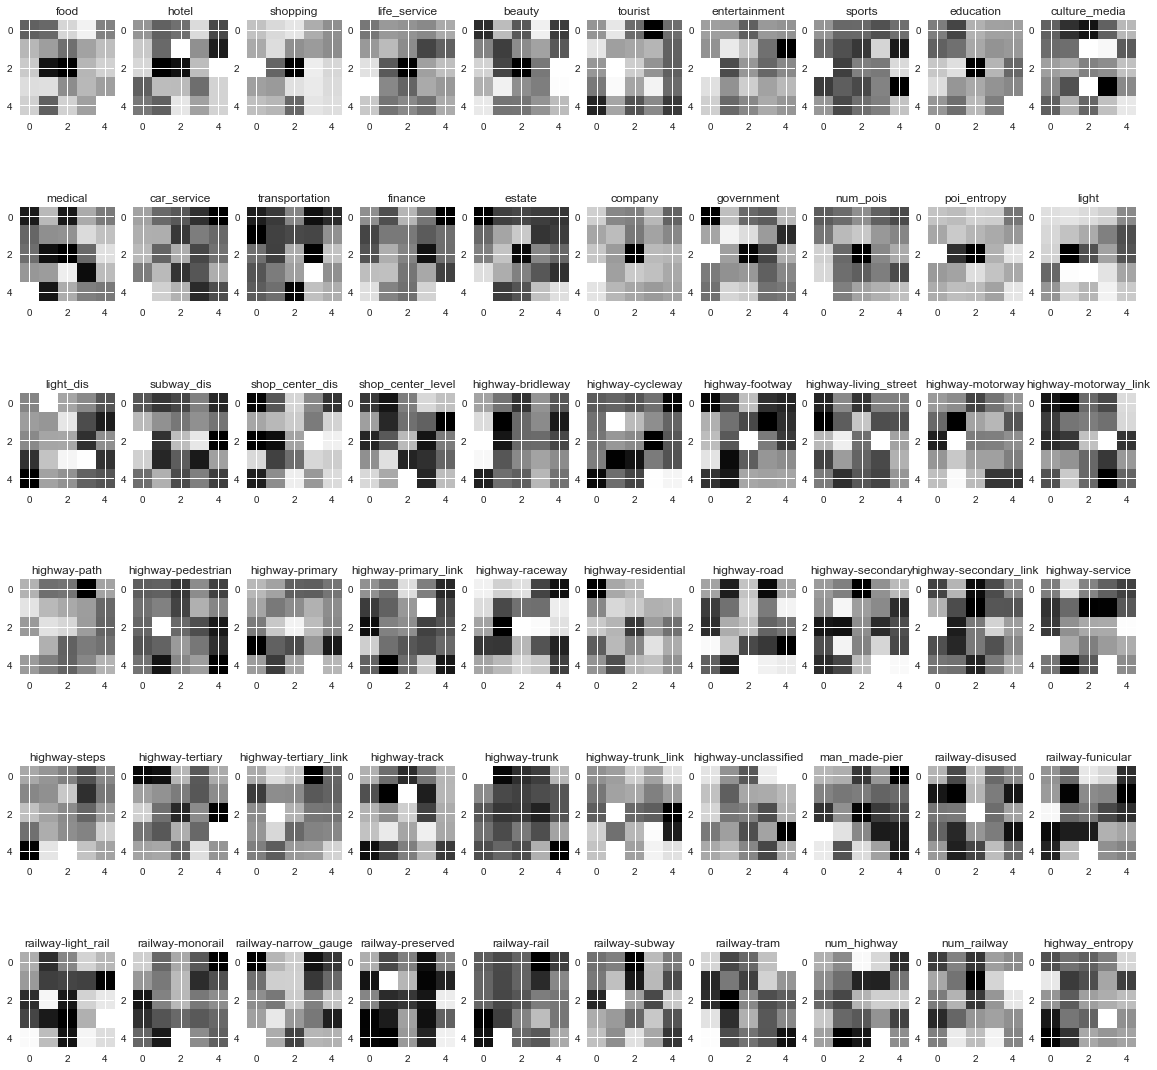

In [29]:
plt.figure(figsize=(20, 20))
for i, f in enumerate(FEATURES):
    plt.subplot(6, 10, i + 1)
    plt.imshow(f_kerenl[:,:,i],interpolation="nearest",cmap="gray")
    plt.title(f)
plt.show()

## Feature Importance

In [34]:
feature_array = kernel.swapaxes(0, 2)

In [39]:
feature_array = feature_array.reshape(feature_array.shape[0], feature_array.shape[1] * feature_array.shape[2] * feature_array.shape[3])

In [40]:
feature_array.shape

(60, 250)

In [51]:
importances = np.linalg.norm(feature_array, ord=2, axis=-1)

In [52]:
imp_df = pd.DataFrame({
    'feature': FEATURES,
    'importance': importances
})

In [53]:
imp_df.sort_values('importance', ascending=False, inplace=True)
imp_df

,feature,importance
22,shop_center_dis,1.317709
18,poi_entropy,1.246447
51,railway-monorail,1.092634
24,highway-bridleway,0.994839
3,life_service,0.902535
10,medical,0.893900
15,company,0.852420
2,shopping,0.847529
41,highway-tertiary,0.846133
19,light,0.828118


## Location Importance

In [55]:
location_array = kernel.reshape(kernel.shape[0], kernel.shape[1], kernel.shape[2] * kernel.shape[3])

In [56]:
loc_importances = np.linalg.norm(location_array, ord=2, axis=-1)

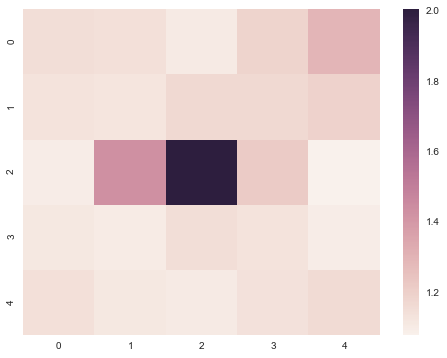

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(loc_importances)
plt.show()